# Hypothesis Testing Notebook - Venezuela

Authors: Rich Pihlstrom, Colin Hwang, Bernardo Medeiros

This is a tweaked notebook created using Rich's Sudan hypothesis-testing notebook as a baseline. Colin sent me his tweaked version of Rich's notebook (to test a particular hypothesis) and I made a couple of additional changes so that other people could use it to test their Spanish data hypotheses as well.

# Datasets

All the data we have is aggregated in one file -- "spanish_monthly_aggregated_data_all.csv".

For Venezuela, we currently only have outflow data. We have outflow data gathered and disseminated by the Brazilian and Colombian governments -- this data is available for every month for Brazil and Colombia.

Additionally, we have data given to us by the IOM for Brazil, Colombia, Curacao, the Dominican Republic, and Barbados. Unfortunately, this data is limited. The months of June and October are missing from the data, and several countries have datapoints repeated for several months.

Within this csv file, tweet data has been aggregated using three methods: sum, max, and mean. The data is separated with monthly granuarity for one year of data in 2022 [01/01/2022 - 12/31/2022].

For sentiment labeling, SVC (with a BERT word embedder) was used, and for emotion labeling, a fine-tuned version of BETO (a BERT model trained on a Spanish-language corpus) was used.

The emotions that were captured include anger, fear, sadness, and joy.


In [60]:
data_file = "spanish_monthly_aggregated_data_all.csv"

# Initializations

Mostly trying to keep things consistent with Rich's notebook with the naming convention (with the exception of renaming the 'IDPs' column).

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [61]:
import pandas as pd

# Rename columns to be consistent with Rich's
df = pd.read_csv(data_file).rename(columns={"country":"location", "month":"date_later", "country_flow_data":"country_flow", "IOM_flow_data":"iom_flow"})

# Convert month names to datetime format with the year 2022
df["date_later"] = pd.to_datetime(df["date_later"] + ' 2022')

agg_methods = ["sum","mean","max"]
senti_models = ["SVM"]
emo_models = ["BETO"]
emotions = ["anger","fear","sadness","joy"]

locations = {i:loc for i, loc in enumerate(list(df["location"].unique()))}

/var/folders/m_/t5v64d613jnfcqbqzhkfp5m80000gn/T/ipykernel_5469/3369568796.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_later"] = pd.to_datetime(df["date_later"] + ' 2022')


# Dataframe

In [62]:
df

,date_later,location,anger (mean),joy (mean),sadness (mean),fear (mean),pos (mean),neg (mean),anger (max),joy (max),...,pos (max),neg (max),anger (sum),joy (sum),sadness (sum),fear (sum),pos (sum),neg (sum),country_flow,iom_flow
0,2022-01-01,Brazil,0.454545,0.227273,0.227273,0.000000,1.954545,3.636364,1,3,...,19,60,10,5,5,0,43,80,6170.0,261441.0
1,2022-01-01,Colombia,1829.785714,788.214286,297.607143,8.285714,1823.892857,3169.142857,5455,1602,...,3088,8822,51234,22070,8333,232,51069,88736,48968.0,1842390.0
2,2022-01-01,Cuba,0.000000,0.307692,0.076923,0.000000,0.769231,1.384615,0,2,...,4,5,0,4,1,0,10,18,NaN,NaN
3,2022-01-01,Curaçao,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0,0,...,1,0,0,0,0,0,1,0,NaN,14159.0
4,2022-01-01,Dominican Republic,34.428571,42.357143,12.357143,0.285714,90.535714,90.500000,92,133,...,210,277,964,1186,346,8,2535,2534,NaN,115283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2022-12-01,Dominican Republic,46.206897,58.275862,22.241379,0.206897,160.655172,123.379310,86,124,...,606,305,1340,1690,645,6,4659,3578,NaN,115283.0
114,2022-12-01,Haiti,0.222222,1.111111,0.148148,0.000000,2.518519,1.074074,2,3,...,9,4,6,30,4,0,68,29,NaN,NaN
115,2022-12-01,Puerto Rico,26.103448,20.620690,4.413793,0.034483,41.413793,54.068966,103,71,...,124,356,757,598,128,1,1201,1568,NaN,NaN
116,2022-12-01,Trinidad and Tobago,17.862069,15.827586,2.793103,0.034483,46.206897,39.068966,211,51,...,131,241,518,459,81,1,1340,1133,NaN,35314.0


# Locations

In [16]:
locations

{0: 'Brazil',
 1: 'Colombia',
 2: 'Cuba',
 3: 'Curaçao',
 4: 'Dominican Republic',
 5: 'Haiti',
 6: 'Puerto Rico',
 7: 'Trinidad and Tobago',
 8: 'Venezuela',
 9: 'Barbados'}

# Helper Functions

Lead lag analysis hasn't been implemented yet.

Need to add functions to remove 0 columns and to generate a correlation matrix between a pair of values

In [63]:
# must be tweaked to work with Spanish data
def rm_0_rows(df):
    return df[~(df[df.columns[2:]] == 0).all(axis=1)]

def corrMat(covars, responses, df):
    corrMat = pd.DataFrame(columns=covars, index=responses)
    for c2 in covars:
        for c1 in responses:
            corrMat.at[c1, c2] = df[c2].corr(df[c1])
    return corrMat

# Parameters

Decide whether to leave imputed zero-rows, select variables (emotion, sentiment, migration), what aggregation methods to consider, and which locations to perform the analysis on.

In [64]:
# Keep zero rows
keep_zero_rows = "Y"

# Variable selection -- "country_migration" and "iom_migration" refer to the different sets of flow data, keep only one
vars = ["country_migration", "emotions", "sentiment"]
#vars = ["iom_migration", "emotions", "sentiment"]

# Aggregation methods -- pick what you want
aggs = ['sum', 'max', 'mean']

# Locations -- if using country flow data, remove countries if want to focus on a specific country or group
locs = ['Brazil', 'Colombia']

# Locations - if using IOM flow data, remove countries if want to focus on a specific country or group
#locs = ['Brazil', 'Colombia', 'Curaçao', 'Dominican Republic', 'Trinidad and Tobago']

# New Dataframe

In [66]:
# Keep zero rows
if keep_zero_rows == "N":
    df = df[df.drop(columns=['location', 'country_flow', 'iom_flow', 'date_later']).sum(axis=1) != 0]

# Variable selection
emotion_cols = ['anger', 'joy', 'sadness', 'fear']
sentiment_cols = ['pos', 'neg']
country_migration_cols = ['country_flow']
iom_migration_cols = ['iom_flow']

selected_cols = []
if "emotions" in vars:
    selected_cols += emotion_cols
if "sentiment" in vars:
    selected_cols += sentiment_cols
if "country_migration" in vars:
    selected_cols += country_migration_cols
if "iom_migration" in vars:
    selected_cols += iom_migration_cols

# Aggregation methods suffixes for column matching
agg_methods = {
    'sum': ' (sum)',
    'mean': ' (mean)',
    'max': ' (max)'
}

# Select columns based off aggregation method selected
agg_cols = [col + agg_methods[agg] for col in selected_cols for agg in aggs if agg in agg_methods and col != 'country_flow' and col!= 'iom_flow']

if 'country_flow' in selected_cols:
    agg_cols.append('country_flow')
if 'iom_flow' in selected_cols:
    agg_cols.append('iom_flow')

# Locations
df = df[df['location'].isin(locs)]

# Final selection
constant_cols = ['location', 'date_later']
df = df[constant_cols + agg_cols]
df = df.reset_index(drop=True)


# New Dataframe

In [67]:
df

,location,date_later,anger (sum),anger (max),anger (mean),joy (sum),joy (max),joy (mean),sadness (sum),sadness (max),...,fear (sum),fear (max),fear (mean),pos (sum),pos (max),pos (mean),neg (sum),neg (max),neg (mean),iom_flow
0,Brazil,2022-01-01,10,1,0.454545,5,3,0.227273,5,2,...,0,0,0.0,43,19,1.954545,80,60,3.636364,261441.0
1,Brazil,2022-02-01,10,3,0.555556,5,1,0.277778,2,1,...,0,0,0.0,21,7,1.166667,22,4,1.222222,261441.0
2,Brazil,2022-03-01,1,1,0.062500,4,3,0.250000,24,16,...,0,0,0.0,40,16,2.500000,10,4,0.625000,316133.0
3,Brazil,2022-04-01,2,1,0.200000,2,1,0.200000,0,0,...,0,0,0.0,18,3,1.800000,10,3,1.000000,325763.0
4,Brazil,2022-05-01,7,2,0.269231,32,15,1.230769,4,1,...,0,0,0.0,57,17,2.192308,25,2,0.961538,345013.0
5,Brazil,2022-06-01,92,53,4.842105,11,3,0.578947,7,4,...,0,0,0.0,125,55,6.578947,26,8,1.368421,NaN
6,Brazil,2022-07-01,5,1,0.238095,13,2,0.619048,1,1,...,0,0,0.0,44,5,2.095238,43,17,2.047619,351958.0
7,Brazil,2022-08-01,12,3,0.571429,16,4,0.761905,10,5,...,0,0,0.0,56,8,2.666667,26,8,1.238095,358412.0
8,Brazil,2022-09-01,8,2,0.380952,9,3,0.428571,75,66,...,0,0,0.0,52,8,2.476190,93,72,4.428571,365387.0
9,Brazil,2022-10-01,6,1,0.240000,9,1,0.360000,5,2,...,0,0,0.0,1038,925,41.520000,76,24,3.040000,NaN


In [68]:
df.info

<bound method DataFrame.info of    location date_later  anger (sum)  anger (max)  anger (mean)  joy (sum)  \
0    Brazil 2022-01-01           10            1      0.454545          5   
1    Brazil 2022-02-01           10            3      0.555556          5   
2    Brazil 2022-03-01            1            1      0.062500          4   
3    Brazil 2022-04-01            2            1      0.200000          2   
4    Brazil 2022-05-01            7            2      0.269231         32   
5    Brazil 2022-06-01           92           53      4.842105         11   
6    Brazil 2022-07-01            5            1      0.238095         13   
7    Brazil 2022-08-01           12            3      0.571429         16   
8    Brazil 2022-09-01            8            2      0.380952          9   
9    Brazil 2022-10-01            6            1      0.240000          9   
10   Brazil 2022-11-01            9            2      0.642857          3   
11   Brazil 2022-12-01            4         

In [ ]:
df.describe

<bound method NDFrame.describe of                 location flow date_later  anger (sum)  joy (sum)  \
0                 Brazil  OUT 2022-01-01           10          5   
1               Colombia  OUT 2022-01-01        51234      22070   
2                   Cuba  OUT 2022-01-01            0          4   
3                Curaçao  OUT 2022-01-01            0          0   
4     Dominican Republic  OUT 2022-01-01          964       1186   
..                   ...  ...        ...          ...        ...   
110   Dominican Republic  OUT 2022-12-01         1340       1690   
111                Haiti  OUT 2022-12-01            6         30   
112          Puerto Rico  OUT 2022-12-01          757        598   
113  Trinidad and Tobago  OUT 2022-12-01          518        459   
114            Venezuela  OUT 2022-12-01        20697      37691   

     sadness (sum)  fear (sum)  pos (sum)  neg (sum)    IDP  
0                5           0         43         80   6170  
1             8333       

# Hypothesis Testing

Compare ratio between positive and negative sentiment with the ratio between positive and negative emotion (joy vs anger, fear, sadness). Added by Colin to test his hypothesis. You may want to add your own new section of code to test your hypothesis.

In [70]:
# Ratio of tweets labeled as positive to those labeled as negative.
pos_neg_ratio = df['pos (sum)'].sum() / df['neg (sum)'].sum()

negative_emotions_ratio = df['joy (sum)'].sum () / df[['fear (sum)', 'anger (sum)', 'sadness (sum)']].sum().sum()

# Compare the ratio of pos vs neg sentiment with pos vs neg emotion
print(f"Ratio of positive to negative sentiment: {pos_neg_ratio:.2f}")
print(f"Ratio of positive to negative emotions: {negative_emotions_ratio:.2f}")

Ratio of positive to negative sentiment: 3.60
Ratio of positive to negative emotions: 0.38


Calculate and visualize the correlation matrix between sentiment, emotions, and flow data.

In [72]:
covar_cols = ['pos (sum)', 'neg (sum)', 'joy (sum)', 'fear (sum)', 'anger (sum)', 'sadness (sum)']

# MUST MANUALLY CHANGE THIS TO MATCH THE FLOW DATA YOU USED!
response_cols = ['country_flow']

cm = corrMat(covar_cols, response_cols, df)
cm

,pos (sum),neg (sum),joy (sum),fear (sum),anger (sum),sadness (sum)
iom_flow,0.464853,-0.16686,0.209214,NaN,-0.14516,0.181689


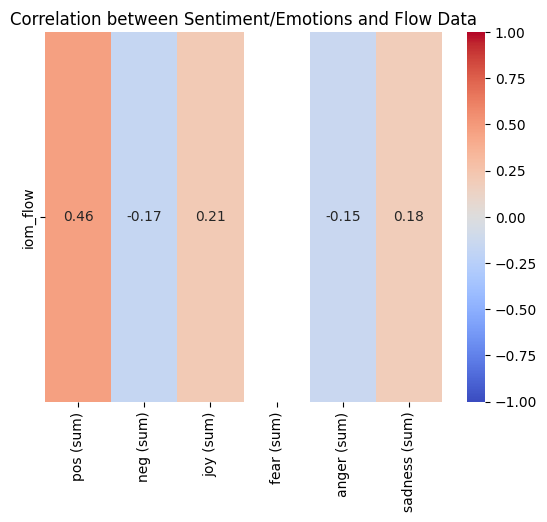

In [73]:
sns.heatmap(cm.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between Sentiment/Emotions and Flow Data")
plt.show()

<ipython-input-145-0aa3e4af9972>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = df.groupby("date_later").aggregate("mean").reset_index()


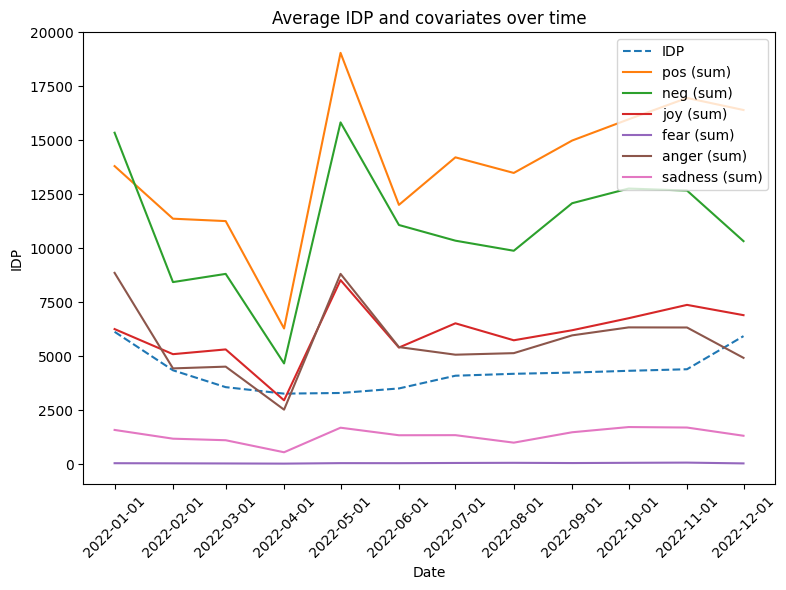

In [ ]:
# Group by date and aggregate by mean
d = df.groupby("date_later").aggregate("mean").reset_index()

row_n = len(response_cols)
fig, axes = plt.subplots(nrows=row_n, ncols=1, figsize=(8, row_n*6))

# Loop through each response variable
for i, r in enumerate(response_cols):
    # Define axis and plot reponse/covariate vars
    ax = axes[i] if row_n > 1 else axes
    ax.plot(d["date_later"], d[r], label=r, linestyle='--')
    for cv in covar_cols:
        ax.plot(d["date_later"], d[cv], label=cv)

    # Titles, ax labels, legend
    ax.set_xlabel("Date")
    ax.set_ylabel(r)
    ax.set_xticks(d["date_later"])
    ax.set_xticklabels(d["date_later"].dt.strftime("%Y-%m-%d"), rotation=45)
    ax.set_title(f"Average {r} and covariates over time")
    ax.legend(loc="upper right")

# Plot time series
plt.tight_layout()
plt.show()
